In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

7. Attribute Information:
   1. Code for class (modified Zurich class)  (A,B,C,D,E,F,H)
   2. Code for largest spot size              (X,R,S,A,H,K)
   3. Code for spot distribution              (X,O,I,C)
   4. Activity                                (1 = reduced, 2 = unchanged)
   5. Evolution                               (1 = decay, 2 = no growth, 
                                               3 = growth)
   6. Previous 24 hour flare activity code    (1 = nothing as big as an M1,
                                               2 = one M1,
                                               3 = more activity than one M1)
   7. Historically-complex                    (1 = Yes, 2 = No)
   8. Did region become historically complex  (1 = yes, 2 = no) 
      on this pass across the sun's disk
   9. Area                                    (1 = small, 2 = large)
  10. Area of the largest spot                (1 = <=5, 2 = >5)

 From all these predictors three classes of flares are predicted, which are 
 represented in the last three columns.

  11. C-class flares production by this region    Number  
      in the following 24 hours (common flares)
  12. M-class flares production by this region    Number
      in the following 24 hours (moderate flares)
  13. X-class flares production by this region    Number
      in the following 24 hours (severe flares)

## Loading dataset

In [10]:
df=pd.read_csv("flares_data.txt")

In [11]:
df

,Class_code,Spot_size,Spot_dist,Act,Evo,24_act,Hist_complx,B_hist_complx,Area,Ar_LS,C_flares,M_flares,X_flares
0,H,A,X,1,3,1,1,1,1,1,0,0,0
1,D,R,O,1,3,1,1,2,1,1,0,0,0
2,C,S,O,1,3,1,1,2,1,1,0,0,0
3,H,R,X,1,2,1,1,1,1,1,0,0,0
4,H,S,X,1,1,1,1,2,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1061,H,S,X,1,2,1,1,1,1,1,0,0,0
1062,H,S,X,2,2,1,1,2,1,1,0,0,0
1063,C,S,O,1,2,1,2,2,1,1,0,0,0
1064,H,R,X,1,2,1,1,2,1,1,0,0,0


## Exploratory Data Analysis

In [12]:
len(df[df['C_flares']==0])

884

In [13]:
print(f"C:{sum(df['C_flares'].tolist())}")
print(f"M:{sum(df['M_flares'].tolist())}")
print(f"X:{sum(df['X_flares'].tolist())}")

C:320
M:50
X:6


In [14]:
print(f"C:{df['C_flares'].unique()}")
print(f"M:{df['M_flares'].unique()}")
print(f"X:{df['X_flares'].unique()}")

C:[0 1 5 2 3 8 4 6]
M:[0 1 4 3 2 5]
X:[0 1 2]


In [15]:
print(f"C:{df['C_flares'].value_counts()}")
print(f"M:{df['M_flares'].value_counts()}")
print(f"X:{df['X_flares'].value_counts()}")

C:C_flares
0    884
1    112
2     33
3     20
4      9
5      4
6      3
8      1
Name: count, dtype: int64
M:M_flares
0    1030
1      29
2       3
3       2
4       1
5       1
Name: count, dtype: int64
X:X_flares
0    1061
1       4
2       1
Name: count, dtype: int64


In [16]:
df[df['X_flares']>0]

,Class_code,Spot_size,Spot_dist,Act,Evo,24_act,Hist_complx,B_hist_complx,Area,Ar_LS,C_flares,M_flares,X_flares
223,F,A,I,2,2,1,2,2,1,1,1,0,1
950,F,K,C,1,2,1,2,2,2,1,0,1,1
960,D,K,C,2,3,1,2,2,2,1,1,3,2
969,E,K,C,2,3,3,2,2,2,1,1,0,1
971,E,K,C,2,3,3,2,2,2,1,0,5,1


In [17]:
df[df['M_flares']>0]

,Class_code,Spot_size,Spot_dist,Act,Evo,24_act,Hist_complx,B_hist_complx,Area,Ar_LS,C_flares,M_flares,X_flares
37,E,A,C,1,3,1,1,2,1,1,3,1,0
54,E,A,I,2,3,1,2,2,1,1,4,4,0
57,D,R,O,1,3,1,1,2,1,1,1,1,0
163,E,K,C,1,3,1,2,2,1,1,0,1,0
171,E,K,C,1,3,1,2,2,2,1,2,1,0
210,D,A,I,1,3,1,1,2,1,1,0,1,0
234,B,X,I,1,2,1,2,2,1,1,0,1,0
270,D,S,I,1,2,1,2,2,1,1,0,3,0
305,H,A,X,1,2,1,2,2,1,1,0,1,0
324,C,S,O,1,3,1,1,2,1,1,0,1,0


In [18]:
def analyse(col_name):
    new_df=df.groupby([col_name])[['C_flares','M_flares','X_flares']].sum()
    hm_df=new_df.copy()
    hm_df['C_flares']=hm_df['C_flares']/320
    hm_df['M_flares']=hm_df['M_flares']/50
    hm_df['X_flares']=hm_df['X_flares']/6
    sns.heatmap(hm_df,annot=True)
    return new_df

,C_flares,M_flares,X_flares
Ar_LS,,,
1,320,50,6


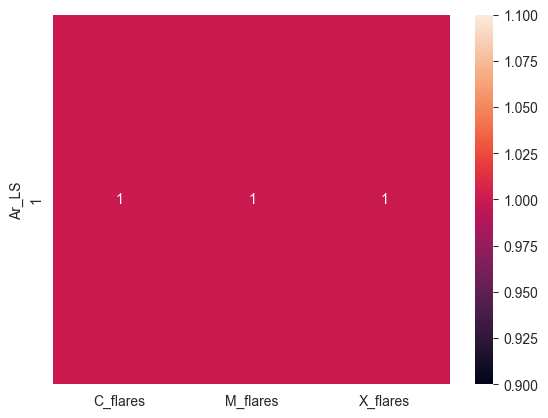

In [19]:
analyse("Ar_LS")

,C_flares,M_flares,X_flares
Class_code,,,
B,11,1,0
C,40,4,0
D,100,22,2
E,109,19,2
F,40,2,2
H,20,2,0


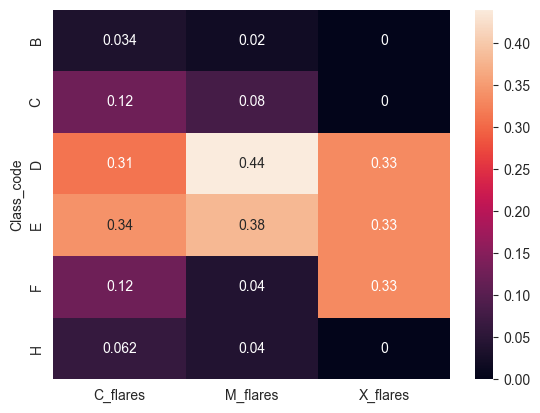

In [20]:
analyse("Class_code")

,C_flares,M_flares,X_flares
Spot_dist,,,
C,38,15,5
I,155,21,1
O,107,12,0
X,20,2,0


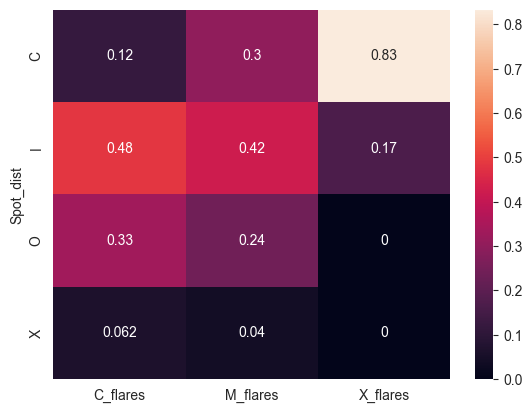

In [21]:
analyse("Spot_dist")

,C_flares,M_flares,X_flares
Spot_size,,,
A,126,18,1
H,8,1,0
K,58,15,5
R,32,3,0
S,85,12,0
X,11,1,0


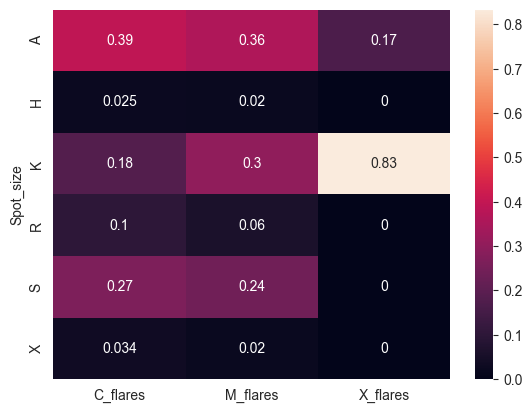

In [22]:
analyse('Spot_size')

,C_flares,M_flares,X_flares
Act,,,
1,187,29,1
2,133,21,5


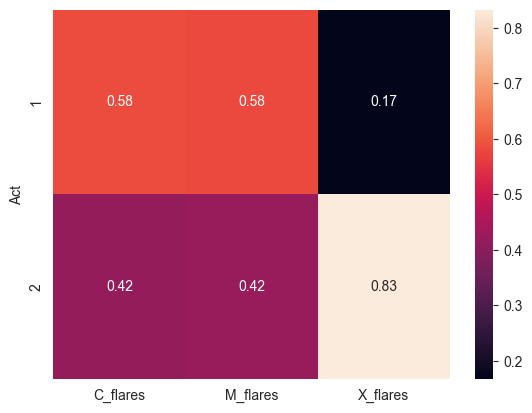

In [23]:
analyse("Act")

,C_flares,M_flares,X_flares
24_act,,,
1,284,41,4
2,8,1,0
3,28,8,2


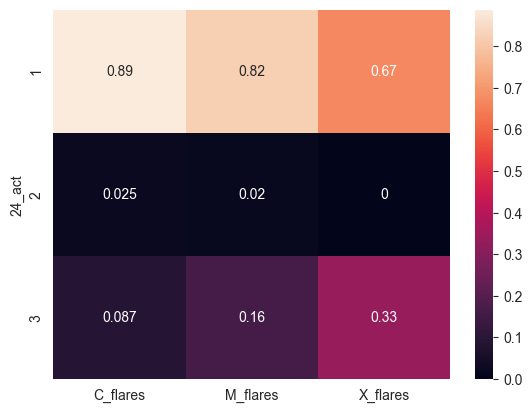

In [24]:
analyse("24_act")

,C_flares,M_flares,X_flares
Area,,,
1,291,36,1
2,29,14,5


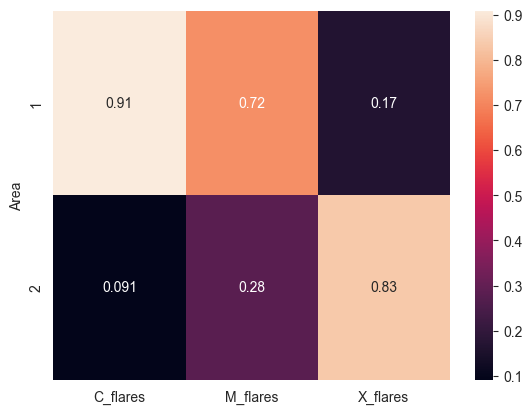

In [25]:
analyse("Area")

,C_flares,M_flares,X_flares
Evo,,,
1,11,1,0
2,138,13,2
3,171,36,4


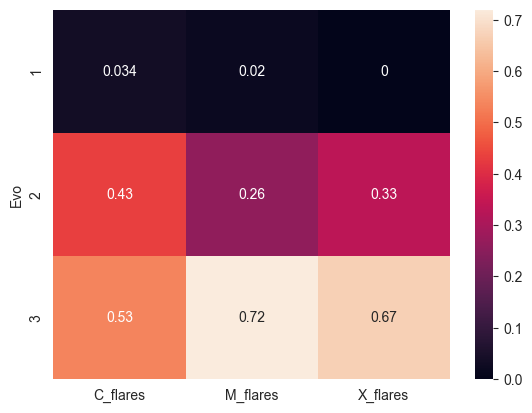

In [26]:
analyse("Evo")

,C_flares,M_flares,X_flares
Hist_complx,,,
1,117,14,0
2,203,36,6


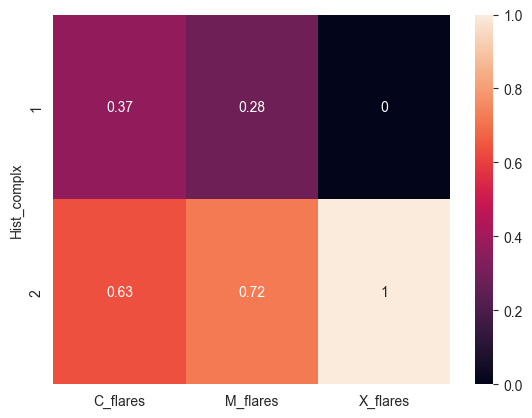

In [27]:
analyse("Hist_complx")

,C_flares,M_flares,X_flares
B_hist_complx,,,
1,8,1,0
2,312,49,6


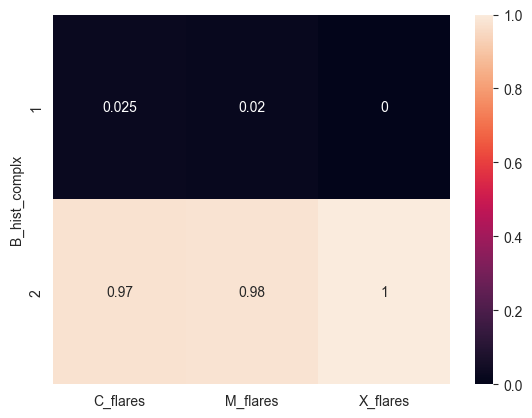

In [28]:
analyse("B_hist_complx")

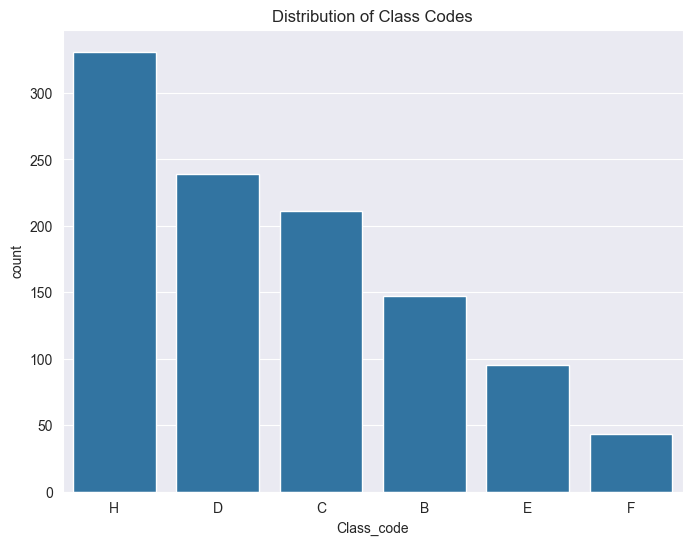

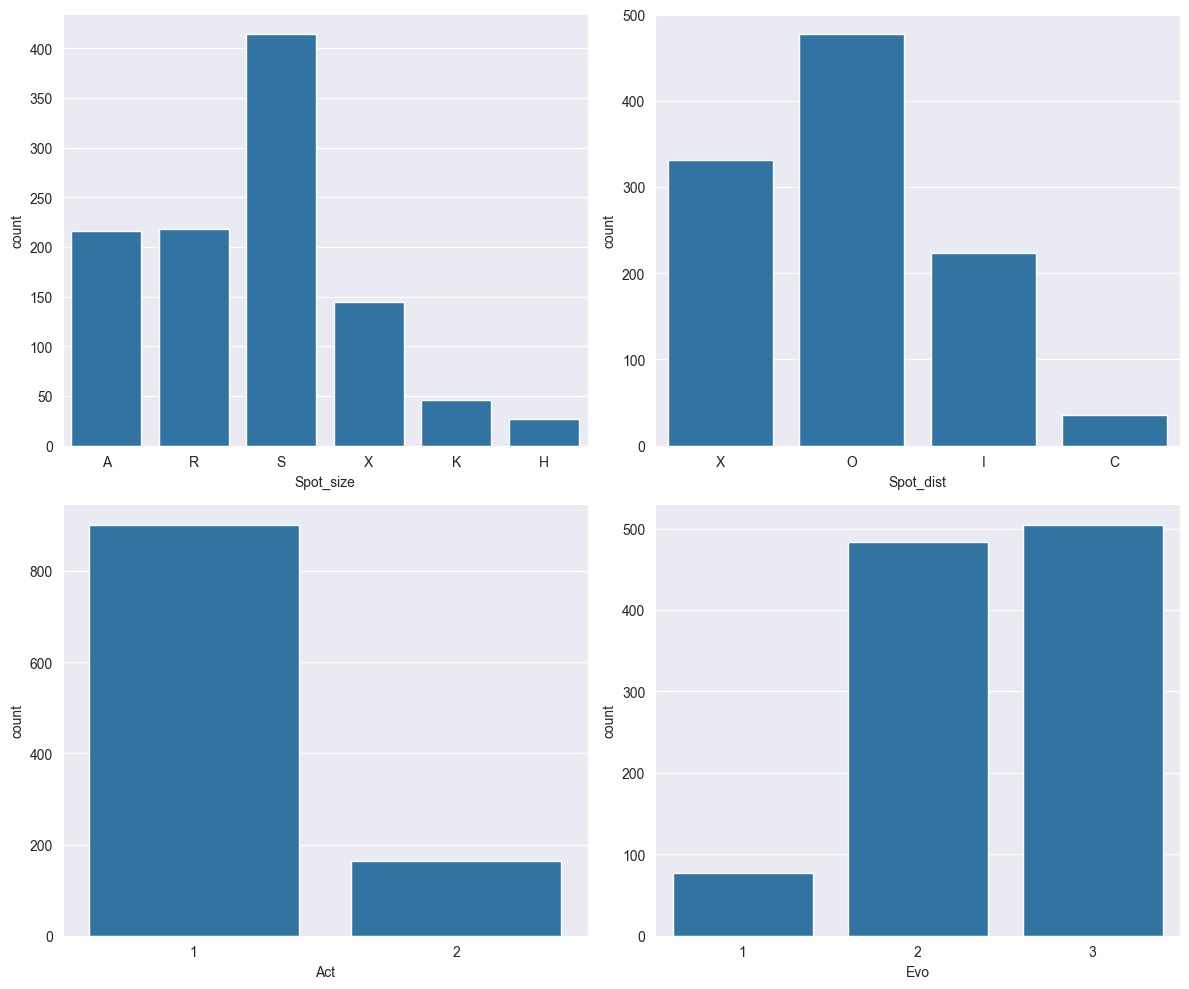

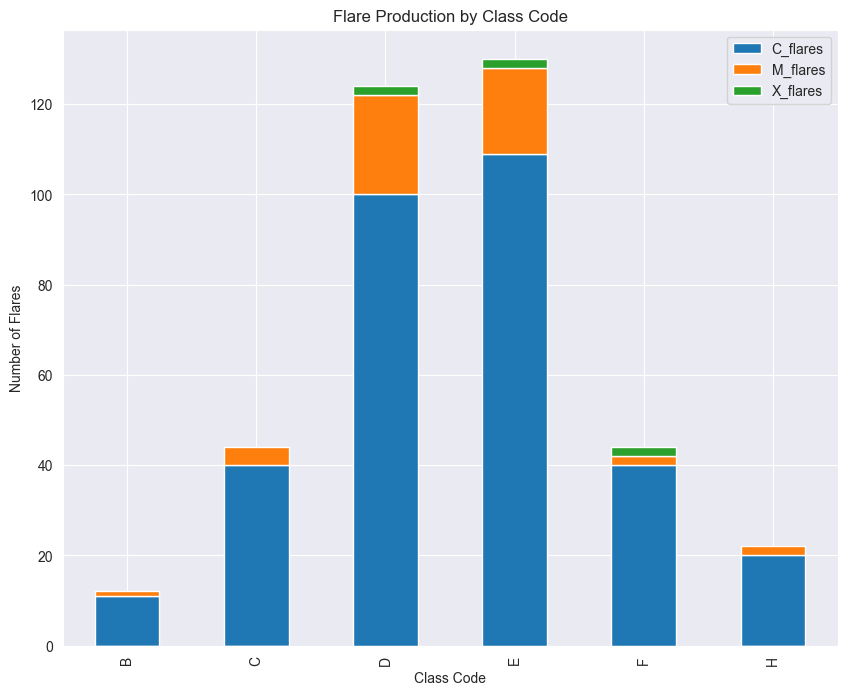

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame with the solar flare data

# Bar Plot for Class Code
plt.figure(figsize=(8, 6))
sns.countplot(x='Class_code', data=df)
plt.title('Distribution of Class Codes')
plt.show()

# Count Plots for Categorical Variables
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
sns.countplot(x='Spot_size', data=df, ax=axes[0, 0])
sns.countplot(x='Spot_dist', data=df, ax=axes[0, 1])
sns.countplot(x='Act', data=df, ax=axes[1, 0])
sns.countplot(x='Evo', data=df, ax=axes[1, 1])
plt.tight_layout()
plt.show()

# Stacked Bar Plot for Flare Production
flare_production = df[['C_flares', 'M_flares', 'X_flares', 'Class_code']].groupby('Class_code').sum()
flare_production.plot(kind='bar', stacked=True, figsize=(10, 8))
plt.title('Flare Production by Class Code')
plt.xlabel('Class Code')
plt.ylabel('Number of Flares')
plt.show()

## Machine learning 

#### Converting string categorical data to integer (dummy variables)

In [30]:
df[df['Class_code']=='A']=0
df[df['Class_code']=='B']=1
df[df['Class_code']=='C']=2
df[df['Class_code']=='D']=3
df[df['Class_code']=='E']=4
df[df['Class_code']=='F']=5
df[df['Class_code']=='H']=6

In [31]:
df[df['Spot_size']=='X']=0
df[df['Spot_size']=='R']=1
df[df['Spot_size']=='S']=2
df[df['Spot_size']=='A']=3
df[df['Spot_size']=='H']=4
df[df['Spot_size']=='K']=5

In [32]:
df[df['Spot_dist']=='X']=0
df[df['Spot_dist']=='O']=1
df[df['Spot_dist']=='I']=2
df[df['Spot_dist']=='C']=3

#### Training and testing the model

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [34]:
Dt_model=DecisionTreeClassifier()

In [35]:
x=df.drop(["C_flares","M_flares","X_flares"],axis=1)
y=df[["C_flares","M_flares","X_flares"]]

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [37]:
Dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [38]:
y_pred=Dt_model.predict(x_test)

In [39]:
y_pred=pd.DataFrame(y_pred)
y_pred.columns=y_test.columns
y_pred

,C_flares,M_flares,X_flares
0,1,1,1
1,1,1,1
2,6,6,6
3,3,3,3
4,2,2,2
...,...,...,...
347,3,3,3
348,2,2,2
349,1,1,1
350,2,2,2


In [40]:
def acc(col_name):
    count=0
    ypl=y_pred[col_name].tolist()
    ytl=y_test[col_name].tolist()
    for i in range(len(y_pred)):
        if(ypl[i]!=ytl[i]):
            count=count+1
    return count

In [41]:
acc_cf=acc("C_flares")
print(acc_cf)

0


In [42]:
acc_mf=acc("M_flares")
print(acc_mf)

0


In [43]:
acc_xf=acc("X_flares")
print(acc_xf)

0


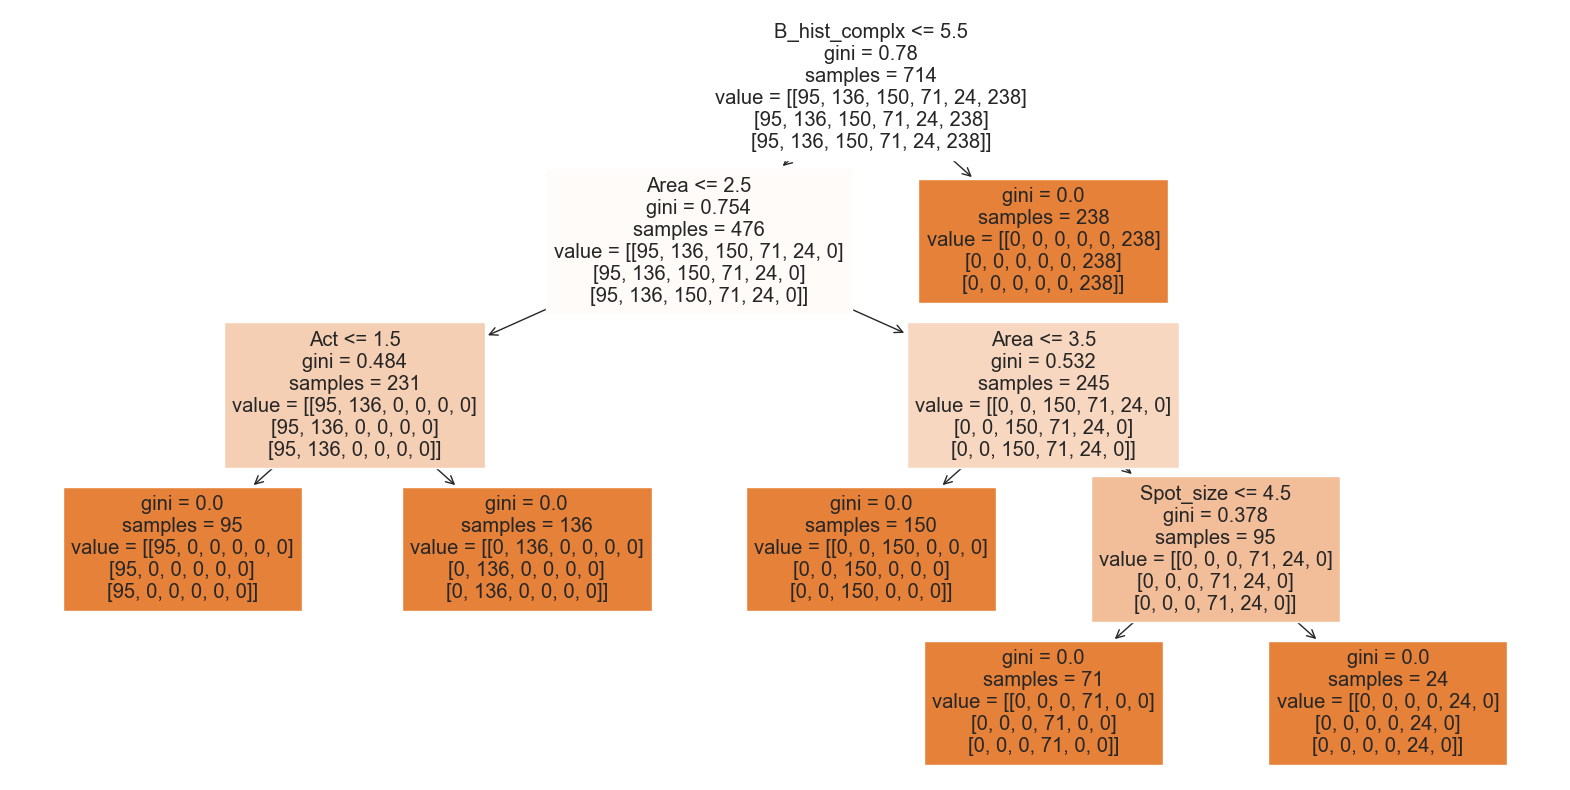

In [44]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Assuming you have already trained the model (Dt_model) using your data

# Plotting the Decision Tree
plt.figure(figsize=(20, 10))  # You can adjust the figure size as needed
plot_tree(Dt_model, filled=True, feature_names=x.columns, class_names=["C_flares", "M_flares", "X_flares"])
plt.show()


In [53]:
from sklearn.tree import export_text

tree_rules = export_text(Dt_model, feature_names=list(x.columns))
print(tree_rules)


|--- B_hist_complx <= 5.50
|   |--- Area <= 2.50
|   |   |--- Act <= 1.50
|   |   |   |--- class: 0
|   |   |--- Act >  1.50
|   |   |   |--- class: 0
|   |--- Area >  2.50
|   |   |--- Area <= 3.50
|   |   |   |--- class: 0
|   |   |--- Area >  3.50
|   |   |   |--- Spot_size <= 4.50
|   |   |   |   |--- class: 0
|   |   |   |--- Spot_size >  4.50
|   |   |   |   |--- class: 0
|--- B_hist_complx >  5.50
|   |--- class: 0



In [45]:
from sklearn.metrics import mean_squared_error

rmse=np.sqrt(mean_squared_error(y_test,y_pred))
rmse

0.0

### Training on all data and testing on different data, Saving Model

In [46]:
final_model=DecisionTreeClassifier()
x_tr=df.drop(["C_flares","M_flares","X_flares"],axis=1)
y_tr=df[["C_flares","M_flares","X_flares"]]


In [47]:
final_model.fit(x_tr,y_tr)

DecisionTreeClassifier()

In [48]:
test_df=pd.read_csv("flare_data2.txt")
test_df[test_df['Class_code']=='A']=0
test_df[test_df['Class_code']=='B']=1
test_df[test_df['Class_code']=='C']=2
test_df[test_df['Class_code']=='D']=3
test_df[test_df['Class_code']=='E']=4
test_df[test_df['Class_code']=='F']=5
test_df[test_df['Class_code']=='H']=6
test_df[test_df['Spot_size']=='X']=0
test_df[test_df['Spot_size']=='R']=1
test_df[test_df['Spot_size']=='S']=2
test_df[test_df['Spot_size']=='A']=3
test_df[test_df['Spot_size']=='H']=4
test_df[test_df['Spot_size']=='K']=5
test_df[test_df['Spot_dist']=='X']=0
test_df[test_df['Spot_dist']=='O']=1
test_df[test_df['Spot_dist']=='I']=2
test_df[test_df['Spot_dist']=='C']=3
test_df

,Class_code,Spot_size,Spot_dist,Act,Evo,24_act,Hist_complx,B_hist_complx,Area,Ar_LS,C_flares,M_flares,X_flares
0,2,2,2,2,2,2,2,2,2,2,2,2,2
1,3,3,3,3,3,3,3,3,3,3,3,3,3
2,2,2,2,2,2,2,2,2,2,2,2,2,2
3,3,3,3,3,3,3,3,3,3,3,3,3,3
4,3,3,3,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,2,2,2,2,2,2,2,2,2,2,2,2,2
319,3,3,3,3,3,3,3,3,3,3,3,3,3
320,4,4,4,4,4,4,4,4,4,4,4,4,4
321,2,2,2,2,2,2,2,2,2,2,2,2,2


In [49]:
x_ts=test_df.drop(["C_flares","M_flares","X_flares"],axis=1)
y_ts=test_df[["C_flares","M_flares","X_flares"]]

In [50]:
y_pr=final_model.predict(x_ts)
y_pr=pd.DataFrame(y_pr)
y_pr.columns=y_ts.columns

In [51]:
def acc2(col_name):
    count=0
    ypl=y_pr[col_name].tolist()
    ytl=y_ts[col_name].tolist()
    for i in range(len(y_pr)):
        if(ypl[i]!=ytl[i]):
            count=count+1
    return count

print(f"C_errors:{acc2('C_flares')}\nM_errors:{acc2('M_flares')}\nC_errors:{acc2('X_flares')}\n")

C_errors:0
M_errors:0
C_errors:0



In [52]:
from joblib import load,dump

dump(final_model,"Solarf_model.joblib")

['Solarf_model.joblib']